In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
import string
import re


data = pd.read_csv("tiktok_google_play_reviews.csv")

<ipython-input-1-5c0c6f622e8c>:11: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("tiktok_google_play_reviews.csv")


In [2]:
data.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,68ccaec8-1415-4301-a85e-3004679a3a83,Cassie Moore,https://play-lh.googleusercontent.com/a/ALm5wu...,No words,5,0,27.1.3,2022-11-29 21:55:37,NaN,NaN
1,d84cbfd3-6aa3-485c-aaf9-c5dca27dc966,Kaleb Plummer,https://play-lh.googleusercontent.com/a-/ACNPE...,Great fun app so far!,5,0,NaN,2022-11-29 21:55:04,NaN,NaN
2,96618aa1-31e5-4259-8649-89b75d962f00,Rylee Maher,https://play-lh.googleusercontent.com/a/ALm5wu...,The app would get a higher rating but I litera...,1,0,27.1.3,2022-11-29 21:54:48,NaN,NaN
3,078c0bda-598b-474e-a04e-d7cb3e6f6301,Kittykatelyn Romilly,https://play-lh.googleusercontent.com/a-/ACNPE...,I WISH I COULD GIVE THIS A 100 PERCENT RATING ...,5,0,NaN,2022-11-29 21:54:35,NaN,NaN
4,8e68c5cd-b12a-4206-a8da-6bfdbff44ae3,Loveness Malenga,https://play-lh.googleusercontent.com/a-/ACNPE...,Pictures and record,5,0,NaN,2022-11-29 21:54:21,NaN,NaN


In [3]:

data = data[["content", "score"]]

data2 = data
data2.head()

,content,score
0,No words,5
1,Great fun app so far!,5
2,The app would get a higher rating but I litera...,1
3,I WISH I COULD GIVE THIS A 100 PERCENT RATING ...,5
4,Pictures and record,5


In [4]:
print(data2.isnull().sum())

content    31
score       0
dtype: int64


In [5]:
data = data2.dropna()

In [6]:
data.head()

,content,score
0,No words,5
1,Great fun app so far!,5
2,The app would get a higher rating but I litera...,1
3,I WISH I COULD GIVE THIS A 100 PERCENT RATING ...,5
4,Pictures and record,5


In [7]:
data.isnull().sum()

content    0
score      0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 460256 entries, 0 to 460286
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   content  460256 non-null  object
 1   score    460256 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 10.5+ MB


In [9]:
ratings = data["score"].value_counts()
numbers = ratings.index
quantity = ratings.values
import plotly.express as px
figure = px.pie(data,
             values=quantity,
             names=numbers,hole = 0.5)
figure.update_layout(
    width=500,
    height=400,
)
figure.show()

In [10]:
storeScore= data["score"].mean()
print("Ortalama Sonuç:", storeScore)

Ortalama Sonuç: 4.234919262323577


In [ ]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["content"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["content"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["content"]]

data = data[["content", "score", "Positive", "Negative", "Neutral"]]
data.head()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,content,score,Positive,Negative,Neutral
0,No words,5,0.000,0.688,0.312
1,Great fun app so far!,5,0.719,0.000,0.281
2,The app would get a higher rating but I litera...,1,0.000,0.073,0.927
3,I WISH I COULD GIVE THIS A 100 PERCENT RATING ...,5,0.561,0.000,0.439
4,Pictures and record,5,0.000,0.000,1.000


In [ ]:
def convert_to_rating(positive, negative, neutral):
    score = round(positive * 4.5 + negative * 1.5 + neutral * 3)
    return max(1, min(5, score))

data["sentimentScore"] = data.apply(lambda row: convert_to_rating(row["Positive"], row["Negative"], row["Neutral"]), axis=1)
data.head()

,content,score,Positive,Negative,Neutral,Rating,sentimentScore
0,No words,5,0.000,0.688,0.312,2,2
1,Great fun app so far!,5,0.719,0.000,0.281,4,4
2,The app would get a higher rating but I litera...,1,0.000,0.073,0.927,3,3
3,I WISH I COULD GIVE THIS A 100 PERCENT RATING ...,5,0.561,0.000,0.439,4,4
4,Pictures and record,5,0.000,0.000,1.000,3,3


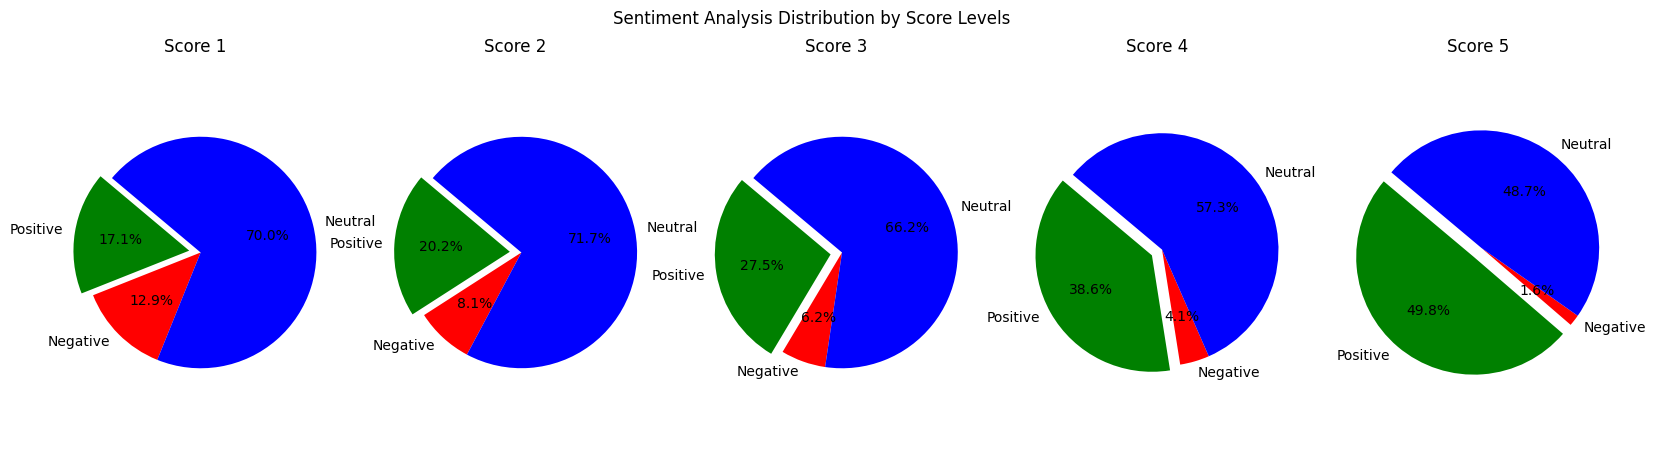

In [ ]:
scores_sum = data.groupby('score')[['Positive', 'Negative', 'Neutral']].sum()

labels = ['Positive', 'Negative', 'Neutral']
colors = ['green', 'red', 'blue']
explode = (0.1, 0, 0)

# Her bir skor için pasta grafiği oluşturma
fig, axs = plt.subplots(1, 5, figsize=(20, 5))
fig.suptitle('Sentiment Analysis Distribution by Score Levels')

for i, score in enumerate(range(1, 6)):
    sizes = [scores_sum.loc[score, 'Positive'], scores_sum.loc[score, 'Negative'], scores_sum.loc[score, 'Neutral']]
    axs[i].pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    axs[i].set_title(f'Score {score}')
    axs[i].axis('equal')

plt.show()

In [ ]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  196353.47899996064
Negative:  16512.73600000027
Neutral:  244154.79300007297


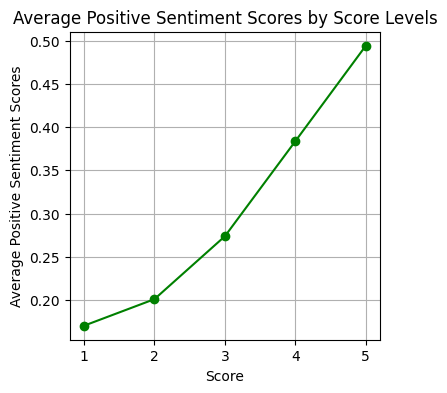

In [ ]:
positive_sentiments = data.groupby('score')['Positive'].mean()

plt.figure(figsize=(4, 4))
plt.plot(positive_sentiments.index, positive_sentiments, marker='o', color='green', linestyle='-')
plt.title('Average Positive Sentiment Scores by Score Levels')
plt.xlabel('Score')
plt.ylabel('Average Positive Sentiment Scores')
plt.grid(True)
plt.show()

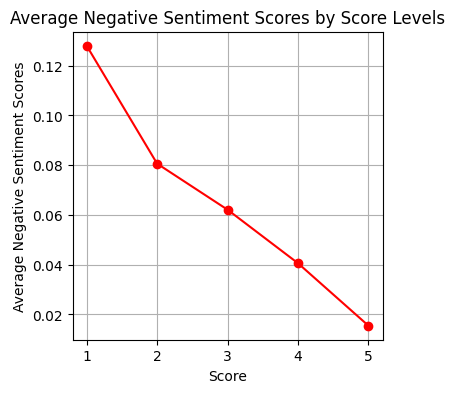

In [ ]:
negative_sentiments = data.groupby('score')['Negative'].mean()

plt.figure(figsize=(4, 4))
plt.plot(negative_sentiments.index, negative_sentiments, marker='o', color='red', linestyle='-')
plt.title('Average Negative Sentiment Scores by Score Levels')
plt.xlabel('Score')
plt.ylabel('Average Negative Sentiment Scores')
plt.grid(True)
plt.show()

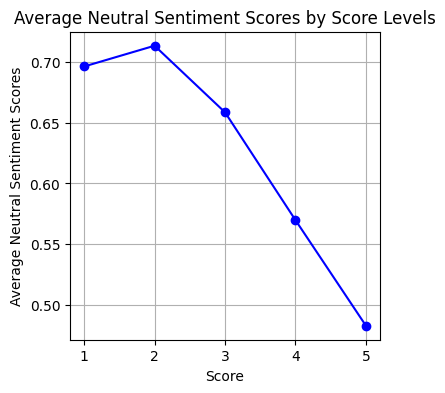

In [ ]:
neutral_sentiments = data.groupby('score')['Neutral'].mean()
plt.figure(figsize=(4, 4))
plt.plot(neutral_sentiments.index, neutral_sentiments, marker='o', color='blue', linestyle='-')
plt.title('Average Neutral Sentiment Scores by Score Levels')
plt.xlabel('Score')
plt.ylabel('Average Neutral Sentiment Scores')
plt.grid(True)
plt.show()

In [ ]:
ratings = data["sentimentScore"].value_counts()
numbers = ratings.index
quantity = ratings.values
import plotly.express as px
figure = px.pie(data,
             values=quantity,
             names=numbers,hole = 0.5)
figure.update_layout(
    width=600,
    height=400,
)
figure.show()

In [ ]:
sentimentScore= data["sentimentScore"].mean()
print("Sentiment Score:", sentimentScore)


Ortalama Sonuç: 3.492751859834527
